In [837]:
# Task A Part (a) Data Visualization.

In [838]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the BrentOilPrices.csv dataset into a dataframe.

brentoilpricesdf = pd.read_csv('C:/Users/Annmo/Downloads/BrentOilPrices.csv')

# Display the first ten rows of the "brentoilpricesdf" to understand the structure of the dataset.

brentoilpricesdf.head(10)

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
5,"May 27, 1987",18.60
6,"May 28, 1987",18.60
7,"May 29, 1987",18.58
8,"Jun 01, 1987",18.65
9,"Jun 02, 1987",18.68


In [839]:
# Remove duplicate rows
brentoilpricesdf = brentoilpricesdf.drop_duplicates()

# Verify the shape of the dataframe after removing duplicates
brentoilpricesdf.shape

(8216, 2)

In [840]:
# Identify all missing values.

brentoilpricesdf.isna().sum() # Provides a count of null / missing values in each column.

Date     0
Price    0
dtype: int64

In [841]:
# Overview of the dataset
brentoilpricesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8216 non-null   object 
 1   Price   8216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [842]:
# Converting CustomerDOB and TransactionDate to datetime format

brentoilpricesdf['Date'] = pd.to_datetime(brentoilpricesdf['Date'], format='mixed', errors = 'coerce')

brentoilpricesdf.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [843]:
# Display the last 10 records of the DataFrame

brentoilpricesdf.tail(10)

,Date,Price
8206,2019-09-17,65.59
8207,2019-09-18,64.29
8208,2019-09-19,64.25
8209,2019-09-20,65.23
8210,2019-09-23,64.66
8211,2019-09-24,64.13
8212,2019-09-25,62.41
8213,2019-09-26,62.08
8214,2019-09-27,62.48
8215,2019-09-30,60.99


In [844]:
brentoilpricesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8216 non-null   datetime64[ns]
 1   Price   8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.5 KB


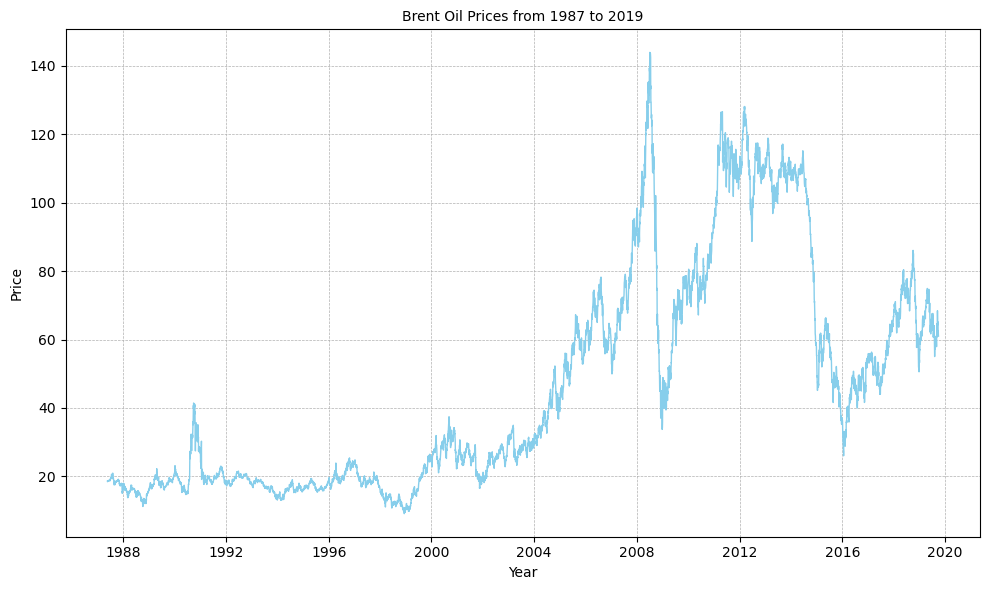

In [845]:
# Plot the Brent oil prices with a sky blue line

plt.figure(figsize=(10, 6))
plt.plot(brentoilpricesdf['Date'], brentoilpricesdf['Price'], color='#87CEEB', linewidth=1)
plt.title('Brent Oil Prices from 1987 to 2019', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [846]:
# Task A Part (b) Build explanatory variables.

In [847]:
brentoilpricesdf = brentoilpricesdf.sort_values(by='Date')

# Calculate the 3-day moving average (MA3) and 9-day moving average (MA9)
brentoilpricesdf['MA3'] = brentoilpricesdf['Price'].rolling(window=3).mean()
brentoilpricesdf['MA9'] = brentoilpricesdf['Price'].rolling(window=9).mean()

# Display the dataframe with the new moving averages
print(brentoilpricesdf[['Date', 'Price', 'MA3', 'MA9']].head(10))

        Date  Price        MA3        MA9
0 1987-05-20  18.63        NaN        NaN
1 1987-05-21  18.45        NaN        NaN
2 1987-05-22  18.55  18.543333        NaN
3 1987-05-25  18.60  18.533333        NaN
4 1987-05-26  18.63  18.593333        NaN
5 1987-05-27  18.60  18.610000        NaN
6 1987-05-28  18.60  18.610000        NaN
7 1987-05-29  18.58  18.593333        NaN
8 1987-06-01  18.65  18.610000  18.587778
9 1987-06-02  18.68  18.636667  18.593333


In [848]:
# Drop rows with NaN values
brentoilpricesdf = brentoilpricesdf.dropna()

# Verify the dataset
print(brentoilpricesdf.head())

         Date  Price        MA3        MA9
8  1987-06-01  18.65  18.610000  18.587778
9  1987-06-02  18.68  18.636667  18.593333
10 1987-06-03  18.75  18.693333  18.626667
11 1987-06-04  18.78  18.736667  18.652222
12 1987-06-05  18.65  18.726667  18.657778


In [849]:
# Task A Part (c) Train and test the data.

In [850]:
from sklearn.model_selection import train_test_split

X = brentoilpricesdf[['MA3', 'MA9']]
Y = brentoilpricesdf[['Price']]


# Split the data into training (80%) and testing (20%) sets
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training set:", Xtrain.shape, Ytrain.shape)
print("Testing set:", Xtest.shape, Ytest.shape)

Training set: (6566, 2) (6566, 1)
Testing set: (1642, 2) (1642, 1)


In [851]:
# Task A Part (d) Build a Linear Regression model.

In [852]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(Xtrain, Ytrain)

LinearRegression()

In [853]:
# Task A Part (e) Prediction function, visualization and result.

In [854]:
# Generate predicted values for the test set using the trained model
Ypredtest = model.predict(Xtest)

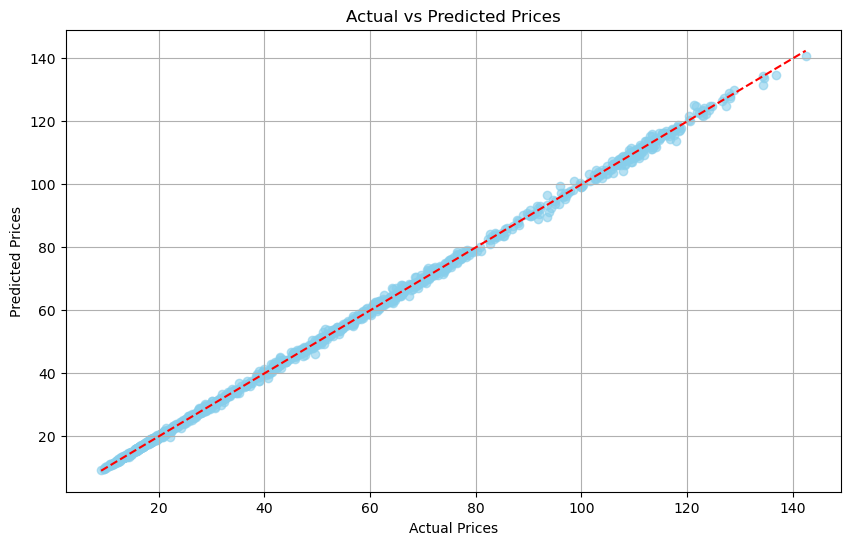

In [855]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Ytest, Ypredtest, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

In [856]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the target values
Ypred_train = model.predict(X_train)
Ypred_test = model.predict(X_test)

# Calculate MSE, RMSE, MAE, and R² for the training set
mse_train = mean_squared_error(y_train, Ypred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, Ypred_train)
r2_train = r2_score(y_train, Ypred_train)

# Calculate MSE, RMSE, MAE, and R² for the test set
mse_test = mean_squared_error(y_test, Ypred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, Ypred_test)
r2_test = r2_score(y_test, Ypred_test)

# Display the results
print("Training Set Accuracy:")
print(f"  MSE: {mse_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  R²: {r2_train:.4f}")

print("\nTest Set Accuracy:")
print(f"  MSE: {mse_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R²: {r2_test:.4f}")


Training Set Accuracy:
  MSE: 0.5977
  RMSE: 0.7731
  MAE: 0.4938
  R²: 0.9994

Test Set Accuracy:
  MSE: 0.5190
  RMSE: 0.7204
  MAE: 0.4673
  R²: 0.9995


In [857]:
# Task A Part (f) Calculate the alpha and beta values.

In [858]:
# Print the model coefficients
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)


Slope: [[ 1.22549343 -0.22610689]]
Intercept: [0.0274723]


In [859]:
#Formulating the Linear Regression Model

In [860]:
# Coefficients and intercept
slope = model.coef_
intercept = model.intercept_

# Formulate the linear regression equation as a string
equation = f"y = ({slope[0][0]:.4f}) * MA3 + ({slope[0][1]:.4f}) * MA9 + ({intercept[0]:.4f})"

# Display the equation
print("Linear Regression Model Equation:")
print(equation)


Linear Regression Model Equation:
y = (1.2255) * MA3 + (-0.2261) * MA9 + (0.0275)
